In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

In [2]:
def plot_roc(y_true, y_score, title='ROC Curve', **kwargs):
    if'pos_label' in kwargs:
        fpr, tpr, thresholds= roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc= roc_auc_score(y_true, y_score)
    else:
        fpr, tpr, thresholds= roc_curve(y_true=y_true, y_score=y_score)
        auc= roc_auc_score(y_true, y_score)
    
    # calculate optimal cut-off with Youden index method 
    optimal_idx= np.argmax(tpr-fpr)
    optimal_threshold= thresholds[optimal_idx]

    figsize= kwargs.get('figsize', (7, 7))
    fig, ax= plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')
    
    # plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('FalsePositiveRate(FPR)')
    ax.set_ylabel('True PositiveRate(TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')
    
    # plot classifier
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # plot optimal cut-off
    ax.scatter(fpr[optimal_idx], tpr[optimal_idx],label='optimalcutoff {:.2f} op ({:.2f},{:.2f})'.format(optimal_threshold, fpr[optimal_idx],tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')
    ax.legend(loc='lower right')
    
    plt.show()

In [3]:
def show_confusion_table(confusion_matrix, labels):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confusion_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    ax.set_xticks(range(0,len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticks(range(0,len(labels)))
    ax.set_yticklabels(labels)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [4]:
# Step 1: read the data
biopsy = pd.read_csv('biopsy.csv', delimiter=';')

In [5]:
# Step 2: Make a model -LDA model fit on 1 input (V1)
X = biopsy[['V1']]
y = biopsy[['class']]
model = LinearDiscriminantAnalysis()
model.fit(X , y)


/home/rubenbrouwers/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

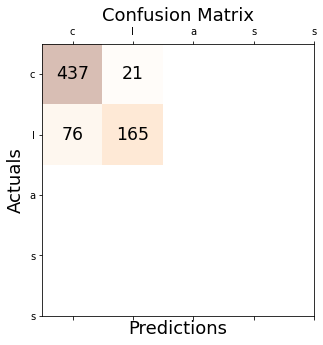

In [6]:
# Step 3: confusion matrix
predicted = model.predict(X)
conf_matrix = confusion_matrix(y_true=y,y_pred=predicted, labels = biopsy['class'].unique())
show_confusion_table(conf_matrix,"class")

In [7]:
# Step 4: calculate metrics>>> accuracy_score (y_true=y,y_pred=predicted)
precision_recall_fscore_support(y_true=y,y_pred=predicted, beta=1.0)

(array([0.85185185, 0.88709677]),
 array([0.95414847, 0.6846473 ]),
 array([0.90010299, 0.77283372]),
 array([458, 241]))

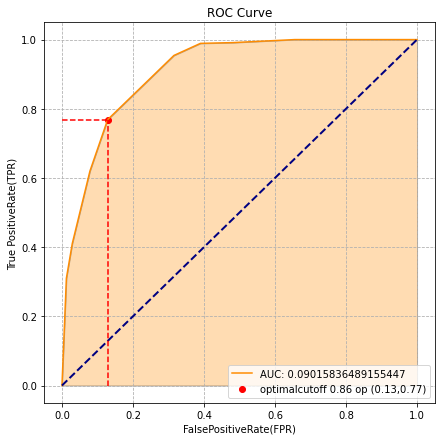

In [8]:
#  Step 5: Plot ROC curve
y_true = y
y_score = model.predict_proba(X)[:,0]
plot_roc(y_true, y_score, pos_label='benign')